# 2. Hyperparameter Search

## Importing Mnist dataset

### Importing libraries

In [1]:
import numpy as np

### Charging data

In [2]:
# Shuffling data function.
from random import shuffle
def shuffle_ds(arr):
    arr_shuf=[]
    indices = list(range(len(arr)))
    shuffle(indices)
    for i in indices:
        arr_shuf.append(arr[i])
    arr_shuf=np.asarray(arr_shuf)
    return arr_shuf

In [3]:
# Charging and shuffling training data
import csv
def get_dataset(ds_file,shuffling=False):
    '''Open train and test datasets, read them and, store their records to a list'''
    with open (ds_file, 'r') as t_file:
        ds = csv.reader(t_file)
        records = []
        label = []
        dataset = []
        for line in ds:
            records.append([int(i) for i in line]) # list comprehension to convert lists' strings to ints on the fly        
        if (shuffling):
            #Shuffling records
            records=shuffle_ds(records)
        # separate col(0) - label from the rest of the list
        for line in records:
            label.append(line[0])
        for line in records:
            dataset.append(line[1:])
    return records,label,dataset

In [4]:
# get our datasets
raw_train_ds, train_labels, train_data = get_dataset('mnist_train.csv',True)
raw_test_ds, test_labels, test_data = get_dataset('mnist_test.csv')

X_train=np.asarray(train_data)
X_test=np.asarray(test_data)
Y_train=np.asarray(train_labels)
Y_test=np.asarray(test_labels)

In [5]:
X_train.shape,X_test.shape

((60000, 784), (10000, 784))

In [6]:
Y_train.shape,Y_test.shape

((60000,), (10000,))

### Data Normalization 

In [7]:
X_train = X_train / 255
X_test = X_test / 255

### Splitting training data in training and validation datasets : 90% - 10%

In [8]:
x_valid, y_valid = X_train[:5000], Y_train[:5000]
x_train, y_train = X_train[5000:], Y_train[5000:]
x_valid.shape,y_valid.shape,x_train.shape,y_train.shape

((5000, 784), (5000,), (55000, 784), (55000,))

## Neural Network Implementation

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#This class implementation is inspired from the NN implemented in cours IFT6093
class NN(object):
    
    
    def __init__(self, input_dim, output_dim,hidden_dims=(1024,2048),n_hidden=2, initialization='zeros', mode=',train',
                 datapath=None,model_path=None):
        
        self.indim = input_dim
        self.hd1 = hidden_dims[0] 
        self.hd2 = hidden_dims[1]
        self.n_hidden = n_hidden
        self.outd = output_dim
        self.W1 = np.zeros(shape=(hidden_dims[0], input_dim))
        #print('W1.shape =', self.W1.shape)
        #print('W1 = ', self.W1)
        #print('\n')
        
        self.b1 = np.zeros(hidden_dims[0])
        #print('b1.shape =', self.b1.shape)
        #print('b1 = ', self.b1)
        #print('\n')
        
        self.W2 = np.zeros(shape=(hidden_dims[1], hidden_dims[0]))
        #print('W2.shape =', self.W2.shape)
        #print('W2 = ', self.W2)
        #print('\n')
        
        self.b2 = np.zeros(hidden_dims[1])
        #print('b2.shape =', self.b2.shape)
        #print('b2 = ', self.b2)
        #print('\n')
        
        self.W3 = np.zeros(shape=(output_dim, hidden_dims[1]))
        #print('W3.shape =', self.W3.shape)
        #print('W3 = ', self.W3)
        #print('\n')
        
        self.b3 = np.zeros(output_dim)
        #print('b3.shape =', self.b3.shape)
        #print('b3 = ', self.b3)
        #print('\n')
        
        if initialization=='normal':
            self.initialize_weights_normal()
            #print('W1 = ', self.W1)
            #print('W2 = ', self.W2)
            #print('W3 = ', self.W3)
            
            
        if initialization=='glorot':
            self.initialize_weights_glorot()
            #print('W1 = ', self.W1)
            #print('W2 = ', self.W2)
            #print('W3 = ', self.W3)
            
        
        self.parameters = [self.W3, self.b3, self.W2, self.b2, self.W1, self.b1]
        
        
    def initialize_weights_normal(self):
        
        self.W1 = np.random.standard_normal(size=(self.hd1, self.indim))
        self.W2 = np.random.standard_normal(size=(self.hd2, self.hd1))
        self.W3 = np.random.standard_normal(size=(self.outd, self.hd2))
        
        return self
    
    
    def initialize_weights_glorot(self):
        
        dl1 = np.sqrt(6/(self.indim + self.hd1))
        dl2 = np.sqrt(6/(self.hd1 + self.hd2))
        dl3 = np.sqrt(6/(self.hd2 + self.outd))
        self.W1 = np.random.uniform(low=(-dl1), high=dl1, size=(self.hd1, self.indim))
        self.W2 = np.random.uniform(low=(-dl2), high=dl2, size=(self.hd2, self.hd1))
        self.W3 = np.random.uniform(low=(-dl3), high=dl3, size=(self.outd, self.hd2))
        
        return self
        
        
        
    #Method inspired from NN implemented in cours IFT6093
    def activation (self,input):
        return (input > 0) * input  
    
    #line 85

    def forward(self,x):
        #print('forward')
        
        a1 = np.dot (self.W1, x) + self.b1 
        #print('a1 = np.dot (self.W1, x) + self.b1')
        #print('a1.shape =', a1.shape)
        #print('a1 = ', a1)
        #print('\n')
        
        h1 = self.activation (a1)
        #print('h1 = self.activation (a1)')
        #print('h1.shape =', h1.shape)
        #print('h1 = ', h1)
        #print('\n')
        
        a2 = np.dot (self.W2, h1) + self.b2
        #print('a2 = np.dot (self.W2, h1) + self.b2')
        #print('a2.shape =', a2.shape)
        #print('a2 = ', a2)
        #print('\n')
        
        h2 = self.activation (a2)
        #print('h2 = self.activation (a2)')
        #print('h2.shape =', h2.shape)
        #print('h2 = ', h2)
        #print('\n')
        
    
        oa = np.dot (self.W3, h2) + self.b3
        #print('oa = np.dot (self.W3, h2) + self.b3')
        #print('oa.shape =', oa.shape)
        #print('oa = ', oa)
        #print('\n')
        
        os = self.softmax (oa, axis=0)
        #print('os = softmax (oa)')
        #print('os.shape =', os.shape)
        #print('os = ', os)
        #print('\n')
               
        return a1, h1, a2, h2, oa, os
    
    

    #Methods inspired from NN implemented in cours IFT6093
    def loss (self, y, os):
        return (y * (-np.log(os))).sum()
    

    def softmax (self,x,axis=1):
        shiftx = x - np.max (x, axis=axis, keepdims=True)
        exps = np.exp (shiftx)
        y = exps / exps.sum (axis=axis, keepdims=True)
        return y


    def backward(self, x, y, a1, h1, a2, h2, oa, os, weight_decay=0, cache=None):
        #print ('backward')
        #print('x.shape = ', x.shape)
        #print('y.shape = ', y.shape)
        #print('os.shape = ', os.shape)
        grad_oa = os - y
        #print('grad_oa.shape =', grad_oa.shape)
        #print('\n')
        
        grad_W3 = np.outer (grad_oa, h2) + weight_decay * self.W3
        #print('grad_W3.shape =', grad_W3.shape)
        #print('\n')
        
        grad_b3 = grad_oa
        #print('grad_b3.shape =', grad_b3.shape)
        #print('\n')
        
        grad_h2 = np.dot (self.W3.T, grad_oa)
        #print(' grad_h2.shape =', grad_h2.shape)
        #print('\n')
        
        grad_a2 = (a2 > 0) * grad_h2
        #print('grad_a2.shape =', grad_a2.shape)
        #print('\n')
        
        grad_W2 = np.outer (grad_a2, h1) + weight_decay * self.W2
        #print('grad_W2.shape =', grad_W2.shape)
        #print('\n')
        
        grad_b2 = grad_a2 
        #print('grad_b2.shape =', grad_b2.shape)
        #print('\n')
        
        grad_h1 = np.dot (self.W2.T, grad_a2)
        #print('grad_h1.shape =', grad_h1.shape)
        #print('\n')
        
        grad_a1 = (a1 > 0) * grad_h1
        #print('grad_a1.shape =', grad_a1.shape)
        #print('\n')
        
        grad_W1 = np.outer (grad_a1, x) + weight_decay * self.W1
        #print('grad_W1.shape =', grad_W1.shape)
        #print('\n')
        
        grad_b1 = grad_a1
        #print('grad_b1.shape =', grad_b1.shape)
        #print('\n')
        
        grads=[grad_W3, grad_b3, grad_W2, grad_b2, grad_W1, grad_b1]
   
        return grads



    def update(self, grads, learning_rate):
        for p, grad in zip(self.parameters, grads):
            p -= learning_rate * grad
        
    #line 201   

    def train_SGD(self, x, y_onehot, n, learning_rate=1e-1, weight_decay=0):
        y= y_onehot
        #print('x.shape = ', x.shape)
        #print('y.shape = ', y.shape)
        losses = 0
        if (n==1):
            a1, h1, a2, h2, oa, os = self.forward(x)
            grads = self.backward(x, y, a1, h1, a2, h2, oa, os)
            self.update(grads, learning_rate)
            loss = self.loss(y, os)
            losses += loss  
            average_loss = losses / n
        else:    
            for j in range(x.shape[0]):
                a1, h1, a2, h2, oa, os = self.forward(x[j])
                grads = self.backward(x[j], y[j], a1, h1, a2, h2, oa, os)
                self.update(grads, learning_rate)
                loss = self.loss(y[j], os)
                losses += loss 
                
            average_loss = losses / n
            #print (average_loss)

        #print (average_loss)   
        return average_loss
    
    
    def prediction_SGD (self, x):
        predictions = np.zeros(x.shape[0])
        for i in range(x.shape[0]):
            _, _, _, _, _, os = self.forward(x[i])
            predictions[i] = os.argmax()
            
        return predictions
    
    def accuracy_SGD (self, prediction, y):
        accuracies=0
        for i in range (y.shape[0]):
            accuracies+=(prediction[i]==y[i])
            
        return accuracies / y.shape[0]
    
    
    def test_SGD(self, x, y_onehot, y):
        pred=np.zeros(y.shape[0])
        avg_loss=0
        for i in range (x.shape[0]):
            _, _, _, _, _, os = self.forward(x[i])
            loss=self.loss (y_onehot[i], os)
            avg_loss+=loss
            pred[i]=os.argmax()
            
        accuracy=self.accuracy_SGD(pred, y)    
        return avg_loss / x.shape[0] , accuracy
    
   
    def forward_mbatch(self, x):
        #print ('forward minibtach')
        a1 = np.dot ( x, self.W1.T) + self.b1 
        #print('a1 = np.dot (x, self.W1.T) + self.b1')
        #print('a1.shape =', a1.shape)
        #print('a1 = ', a1)
        #print('\n')
        
        h1 = self.activation (a1)
        #print('h1 = self.activation (a1)')
        #print('h1.shape =', h1.shape)
        #print('h1 = ', h1)
        #print('\n')
        
        a2 = np.dot (h1, self.W2.T) + self.b2
        #print('a2 = np.dot (h1, self.W2.T) + self.b2')
        #print('a2.shape =', a2.shape)
        #print('a2 = ', a2)
        #print('\n')
        
        h2 = self.activation (a2)
        #print('h2 = self.activation (a2)')
        #print('h2.shape =', h2.shape)
        #print('h2 = ', h2)
        #print('\n')
        
        oa = np.dot (h2, self.W3.T) + self.b3
        #print('oa = np.dot (h2, self.W3.T) + self.b3')
        #print('oa.shape =', oa.shape)
        #print('oa = ', oa)
        #print('\n')
        
        os = self.softmax (oa, axis=1)
        #print('os = softmax (oa)')
        #print('os.shape =', os.shape)
        #print('os = ', os)
        #print('\n')
               
        return a1, h1, a2, h2, oa, os
    
    #line 303
        
    def backward_mbatch(self, x, y, a1, h1, a2, h2, oa, os, batch_n, weight_decay=0):
        #print ('backward minibatch')
        
        #print('x.shape = ', x.shape)
        #print('y.shape = ', y.shape)
        #print('os.shape = ', os.shape)
        
        
        batch_n = x.shape[0]
        bgrad_oa = os - y
        #print('bgrad_oa.shape =', bgrad_oa.shape)
        #print('\n')
        
        bgrad_W3 = np.dot (bgrad_oa.T, h2) / batch_n  + weight_decay * self.W3
        #print('bgrad_W3.shape =', bgrad_W3.shape)
        #print('\n')
        
        bgrad_b3 = bgrad_oa.mean(axis=0)
        #print('bgrad_b3.shape =', bgrad_b3.shape)
        #print('\n')
        
        bgrad_h2 = np.dot (bgrad_oa, self.W3)
        #print(' bgrad_h2.shape =', bgrad_h2.shape)
        #print('\n')
        
        bgrad_a2 = (a2 > 0) * bgrad_h2
        #print('bgrad_a2.shape =', bgrad_a2.shape)
        #print('\n')
        
        bgrad_W2 = np.dot (bgrad_a2.T, h1) / batch_n  + weight_decay * self.W2
        #print('bgrad_W2.shape =', bgrad_W2.shape)
        #print('\n')
        
        bgrad_b2 = bgrad_a2.mean(axis=0) 
        #print('bgrad_b2.shape =', bgrad_b2.shape)
        #print('\n')
        
        bgrad_h1 = np.dot (bgrad_a2, self.W2)
        #print('bgrad_h1.shape =', bgrad_h1.shape)
        #print('\n')
        
     
        bgrad_a1 = (a1 > 0) * bgrad_h1
        #print('bgrad_a1.shape =', bgrad_a1.shape)
        #print('\n')
        
        bgrad_W1 = np.dot (bgrad_a1.T, x) / batch_n  + weight_decay * self.W1
        #print('bgrad_W1.shape =', bgrad_W1.shape)
        #print('\n')
        
        bgrad_b1 = bgrad_a1.mean(axis=0)
        #print('bgrad_b1.shape =', bgrad_b1.shape)
        #print('\n')
        
        bgrads=[bgrad_W3, bgrad_b3, bgrad_W2, bgrad_b2, bgrad_W1, bgrad_b1]
   
        return bgrads

    #line 360

    #Method taken fron homwork 3 in cours IFT6093
    def loss_mbatch(self, os, y):
        return (y * (-np.log(os))).sum(axis=1).mean(axis=0)     
        
    
    #training with minibatch gradient decent
    def train_mbatch(self, x, y_onehot, mb_size=100, learning_rate=1e-1, weight_decay=0):
        average_loss=0
        for i in range (0, x.shape[0], mb_size):
            #print (i)
            xi = x[i:(i+mb_size)]
            yi = y_onehot[i:(i+mb_size)]
        
            losses = 0
            a1, h1, a2, h2, oa, os = self.forward_mbatch(xi)
            grads = self.backward_mbatch (xi, yi,a1, h1, a2, h2,oa, os, mb_size)
            self.update(grads, learning_rate)
            average_loss = self.loss_mbatch(os, yi) 
                          
        return average_loss
    
    
    #line 385
    
    def prediction_mbatch (self, x):
        _, _, _, _, _, os = self.forward_mbatch(x)
        return os.argmax(axis=1)
    

    def accuracy_mbatch (self, prediction, y):
        accuracy = np.zeros(y.shape[0])
        accuracy = prediction == y
        return accuracy.mean(axis=0)
    

    def test_mbatch(self, x, y_onehot, y):
        _, _, _, _, _, os = self.forward_mbatch(x)
        loss = self.loss_mbatch (os, y_onehot)
        accuracy=self.accuracy_mbatch (os.argmax(axis=1), y)
        return loss, accuracy
    
    
    def finite_difference():
        
        pass

In [11]:
# Comment to get non-deterministic results
np.random.seed(2)

## Model application

In [12]:
x_valid.shape,y_valid.shape,x_train.shape,y_train.shape

((5000, 784), (5000,), (55000, 784), (55000,))

In [13]:
def onehot(y, n_classes):
    o = np.zeros(shape=(y.shape[0], n_classes))
    for i in range(y.shape[0]):
        o[i, int(y[i])] = 1
    return o

### Backpropagation for 1 exemple

In [14]:
# self, input_dim, output_dim,hidden_dims=(1024,2048),n_hidden=2, initialization=zeros, mode=',train',
# datapath=None,model_path=None
x=x_train[0]
y=y_train[0]
y = np.zeros(shape=(10, ))
y[y_train[0]] = 1

NN_model= NN(784, 10, hidden_dims=(500,300),initialization='glorot')

a1, h1, a2, h2, oa, os = NN_model.forward(x_train[0])

#self,cache, x, y,a1, h1, a2, h2, oa, os, weight_decay=0)
grads=NN_model.backward(x, y, a1, h1, a2, h2, oa, os)

print ('a1 shape = ', a1.shape)
print ('h1 shape = ', h1.shape)
print ('a2 shape = ', a2.shape)
print ('h2 shape = ', h2.shape)
print ('oa shape = ', oa.shape)
print ('os shape = ', os.shape)

a1 shape =  (500,)
h1 shape =  (500,)
a2 shape =  (300,)
h2 shape =  (300,)
oa shape =  (10,)
os shape =  (10,)


In [15]:
#training 10 epoch for 1 exemple

#x, y_onehot, n, learning_rate=1e-1, weight_decay=0
epochs=10
for epoch in range (epochs):
    loss=NN_model.train_SGD(x, y, 1)
    print('epoch ', epoch, ' loss ', loss)

epoch  0  loss  2.8663589344759735
epoch  1  loss  0.029244015414809938
epoch  2  loss  0.015545423979285988
epoch  3  loss  0.010871003852353348
epoch  4  loss  0.008353857640178769
epoch  5  loss  0.006773193810087523
epoch  6  loss  0.0056870035464088205
epoch  7  loss  0.004895298281284349
epoch  8  loss  0.0042913673747260635
epoch  9  loss  0.0038179378845388224


## Checking the best hyperparameters with validation dataset

### Functions declaration:

In [16]:
# Train the model using different hyperparameters, like mini-batch size, learning rate and epochs number
# x_ds is the dataset to train, y_ds is the target dataset.
def hyperparameter_checking(x_ds,y_ds,epochs,minibatch,learningrate,verbose=False):
    x = x_ds
    print('x.shape = ', x.shape)
    y = y_ds
    y=onehot(y,10)
    print('y.shape = ', y.shape)

    # input_dim, output_dim,hidden_dims,n_hidden=2,mode=',train',
    # datapath=None,model_path=None
    NN_mbatch_1= NN(784, 10, hidden_dims=(500,300),initialization='glorot')
    loss_arr=[]
    loss_mbatch_1=0
    for epoch in range (epochs): 
        #x, y_onehot, mb_size=100, learning_rate=1e-1, weight_decay=0
        loss_mbatch_1=NN_mbatch_1.train_mbatch(x, y, mb_size=minibatch,learning_rate=learningrate)
        if verbose:
            print('epoch ', epoch, ' loss ', loss_mbatch_1)
        loss_arr.append(loss_mbatch_1)
    loss,accuracy=NN_mbatch_1.test_mbatch(x_ds,y,y_ds)
    print('epoch ', epoch, ' loss ', loss_mbatch_1)
    return loss_arr,accuracy,NN_mbatch_1

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Display differents graphs using different hyperparameters saved in arrays.
# Input variables are arrays with the same lenght, with the values to graph

def show_graphs(minibatch_arr,epoch_arr,learningrate_arr,loss_arr):
# define a list of markevery cases to plot
    cases=[]
    x_values=[]
    y_values=[]
    for i in range(len(minibatch_arr)):
        cases.append([minibatch_arr[i],epoch_arr[i],learningrate_arr[i]])
        # define the data for cartesian plots
        x_values.append(range(epoch_arr[i]))
        y_values.append(loss_arr[i])
    # define the figure size and grid layout properties
    figsize = (10, 6)
    cols = 2
    gs = gridspec.GridSpec(len(cases) // cols + 1, cols)
    gs.update(hspace=0.4)
    
    fig1 = plt.figure(num=1, figsize=figsize)
    ax = []
    for i, case in enumerate(cases):
        row = (i // cols)
        col = i % cols
        ax.append(fig1.add_subplot(gs[row, col]))
        ax[-1].set_title('Minibatch=%s, Epoch=%s, Learning=%s' % (str(case[0]),str(case[1]),str(case[2])))
        ax[-1].plot(x_values[i], y_values[i], 'o', ls='-', ms=4, markevery=1)

## Using different hyperparameters with validation set and Glorot initialization:

## * Changing Mini-batch size:

### With Mini-batch size=500, Epoch=100, Learning rate=0.001:

In [18]:
x_ds=x_valid
y_ds=y_valid

In [19]:
loss_arr1=[]
epoch_1=100
mb_1=500
lr_1=1e-3
loss_arr1,acc_1,nn_model=hyperparameter_checking(x_ds,y_ds,epoch_1,mb_1,lr_1)
print('Accuracy: %s' % str(acc_1))

x.shape =  (5000, 784)
y.shape =  (5000, 10)
epoch  99  loss  1.5519104546401783
Accuracy: 0.7166


### With Mini-batch size=150, Epoch=100, Learning rate=0.001:

In [20]:
loss_arr2=[]
epoch_2=100
mb_2=150
lr_2=1e-3
loss_arr2,acc_2,nn_model=hyperparameter_checking(x_ds,y_ds,epoch_2,mb_2,lr_2)
print('Accuracy: %s' % str(acc_2))

x.shape =  (5000, 784)
y.shape =  (5000, 10)
epoch  99  loss  0.6375634375762261
Accuracy: 0.8512


### With Mini-batch size=100, Epoch=100, Learning rate=0.001: 

In [21]:
loss_arr3=[]
epoch_3=100
mb_3=100
lr_3=1e-3
loss_arr3,acc_3,nn_model=hyperparameter_checking(x_ds,y_ds,epoch_3,mb_3,lr_3)
print('Accuracy: %s' % str(acc_3))

x.shape =  (5000, 784)
y.shape =  (5000, 10)
epoch  99  loss  0.520678044010444
Accuracy: 0.8808


### With Mini-batch size=50, Epoch=100, Learning rate=0.001:

In [22]:
loss_arr4=[]
epoch_4=100
mb_4=50
lr_4=1e-3
loss_arr4,acc_4,nn_model=hyperparameter_checking(x_ds,y_ds,epoch_4,mb_4,lr_4)
print('Accuracy: %s' % str(acc_4))

x.shape =  (5000, 784)
y.shape =  (5000, 10)
epoch  99  loss  0.4135312656833283
Accuracy: 0.9022


In [23]:
accuracy_arr=[acc_1,acc_2,acc_3,acc_4]
x_val=[mb_1,mb_2,mb_3,mb_4]
minibatch_arr=[mb_1,mb_2,mb_3,mb_4]
epoch_arr=[epoch_1,epoch_2,epoch_3,epoch_4]
learningrate_arr=[lr_1,lr_2,lr_3,lr_4]
loss_arr=[loss_arr1,loss_arr2,loss_arr3,loss_arr4]

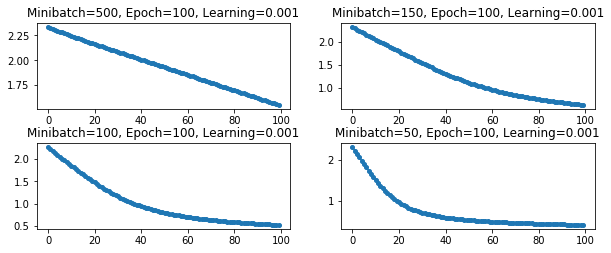

In [24]:
show_graphs(minibatch_arr,epoch_arr,learningrate_arr,loss_arr)

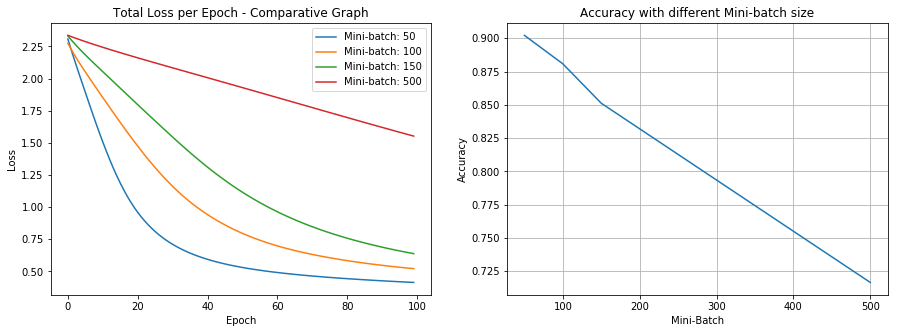

In [25]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
# plt.xlabel('Epoch')
ax[1].plot(minibatch_arr, accuracy_arr, markevery=1)
ax[1].set_xlabel('Mini-Batch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy with different Mini-batch size')
ax[1].grid(True)
ax[0].plot(range(epoch_4), loss_arr4, label='Mini-batch: %s' % str(mb_4))
ax[0].plot(range(epoch_3), loss_arr3, label='Mini-batch: %s' % str(mb_3))
ax[0].plot(range(epoch_2), loss_arr2, label='Mini-batch: %s' % str(mb_2))
ax[0].plot(range(epoch_1), loss_arr1, label='Mini-batch: %s' % str(mb_1))
ax[0].legend()
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Total Loss per Epoch - Comparative Graph')
plt.show()

###  While the Mini-batch size is decreasing, the model obtain a better accuracy.  

## * Changing Learning-size:

### With Mini-batch size=50, Epoch=100, Learning rate=0.01:

In [26]:
loss_arr4_b=[]
epoch_4_b=100
mb_4_b=50
lr_4_b=1e-2
loss_arr4_b,acc_4_b,nn_model=hyperparameter_checking(x_ds,y_ds,epoch_4_b,mb_4_b,lr_4_b)
print('Accuracy: %s' % str(acc_4_b))

x.shape =  (5000, 784)
y.shape =  (5000, 10)
epoch  99  loss  0.05383688297627295
Accuracy: 0.9934


### With Mini-batch size=50, Epoch=100, Learning rate=0.1:

In [27]:
loss_arr4_c=[]
epoch_4_c=100
mb_4_c=50
lr_4_c=1e-1
loss_arr4_c,acc_4_c,nn_model=hyperparameter_checking(x_ds,y_ds,epoch_4_c,mb_4_c,lr_4_c)
print('Accuracy: %s' % str(acc_4_c))

x.shape =  (5000, 784)
y.shape =  (5000, 10)
epoch  99  loss  0.0008481684277573376
Accuracy: 1.0


In [28]:
accuracy_arr=[acc_4,acc_4_b,acc_4_c]
minibatch_arr=[mb_4,mb_4_b,mb_4_c]
epoch_arr=[epoch_4,epoch_4_b,epoch_4_c]
learningrate_arr=[lr_4,lr_4_b,lr_4_c]
loss_arr=[loss_arr4,loss_arr4_b,loss_arr4_c]

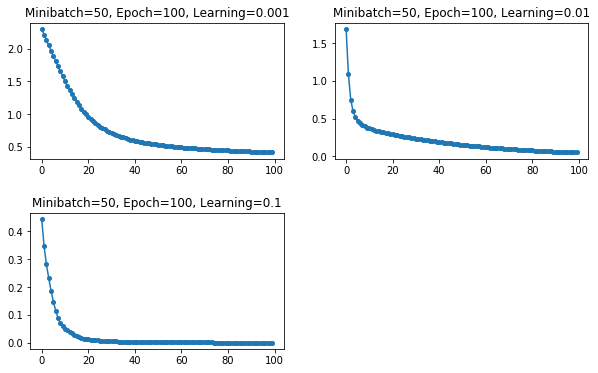

In [29]:
show_graphs(minibatch_arr,epoch_arr,learningrate_arr,loss_arr)

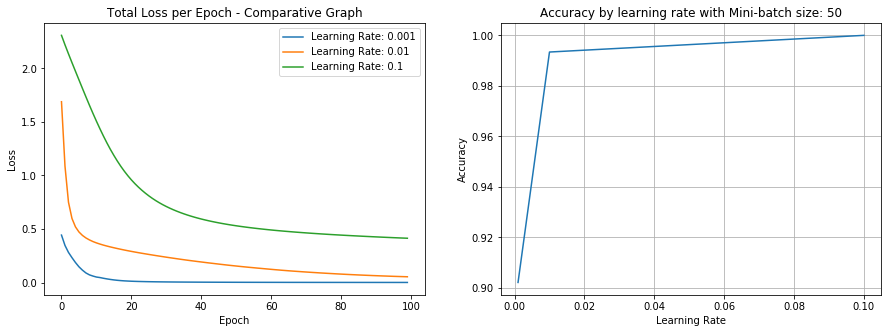

In [30]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
# plt.xlabel('Epoch')
ax[1].plot(learningrate_arr, accuracy_arr, markevery=1)
ax[1].set_xlabel('Learning Rate')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy by learning rate with Mini-batch size: 50')
ax[1].grid(True)
ax[0].plot(range(epoch_4_c), loss_arr4_c, label='Learning Rate: %s' % str(lr_4))
ax[0].plot(range(epoch_4_b), loss_arr4_b, label='Learning Rate: %s' % str(lr_4_b))
ax[0].plot(range(epoch_4), loss_arr4, label='Learning Rate: %s' % str(lr_4_c))
ax[0].legend()
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Total Loss per Epoch - Comparative Graph')
plt.show()

### We get a better accuracy if we choose a  lower learning rate. 

### The best hyperparameters to train the model are Mini-batch size: 50 and Learning Rate: 0.1

## Training the model:

### Training the model with Mini-batch size=50, Epoch=100 and Learning rate=0.1

In [31]:
x_ds=x_train
y_ds=y_train

In [32]:
loss_arr=[]
epoch=100
mb=50
lr=1e-1
loss_arr,acc,nn_model=hyperparameter_checking(x_ds,y_ds,epoch,mb,lr,verbose=True)
print('Accuracy: %s' % str(acc))

x.shape =  (55000, 784)
y.shape =  (55000, 10)
epoch  0  loss  0.13176645924226313
epoch  1  loss  0.10314581789954902
epoch  2  loss  0.09225864836621345
epoch  3  loss  0.06635386897733293
epoch  4  loss  0.04591451286314806
epoch  5  loss  0.024781689777613268
epoch  6  loss  0.014771248926471407
epoch  7  loss  0.010748576282946336
epoch  8  loss  0.006725486778320523
epoch  9  loss  0.005709518989337752
epoch  10  loss  0.004579207348883854
epoch  11  loss  0.0041308868382977535
epoch  12  loss  0.0037266490325506725
epoch  13  loss  0.003469273890420713
epoch  14  loss  0.0032835272462715683
epoch  15  loss  0.0029727578546135795
epoch  16  loss  0.002632683450968506
epoch  17  loss  0.0023048709970630533
epoch  18  loss  0.002097183084752607
epoch  19  loss  0.0018706774283173979
epoch  20  loss  0.001717327303123163
epoch  21  loss  0.0015739711438226443
epoch  22  loss  0.0014613560952463167
epoch  23  loss  0.0013372944573118522
epoch  24  loss  0.0012481494451534506
epoch  2

### The accuracy obtained by the model with the training set is: 100%

### The accuracy obtained by the model with the testing set is:

In [34]:
y_pred=nn_model.prediction_mbatch(X_test)
accuracy=nn_model.accuracy_mbatch(y_pred,Y_test)
print('Accuracy: ', accuracy)

Accuracy:  0.9818
